# <span style = "color:IndianRed; font-size:40px"> Face mask </span>

### Import necessary libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers, applications
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Fetch the training Data

#### Use glob

The data contains 4 subclasses. Store all 4 in different variables

In [18]:
with_mask = glob('with_mask 1/*.jpg')[0:500]
without_mask = glob('without_mask/*.jpg')[0:500]


### Store all the images inside a list and create a list with the corresponding labels

In [19]:
dic={0:'with_mak',1:'without_mask'}

In [20]:
images = []
labels = []

for i in with_mask:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in without_mask:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

## print some images

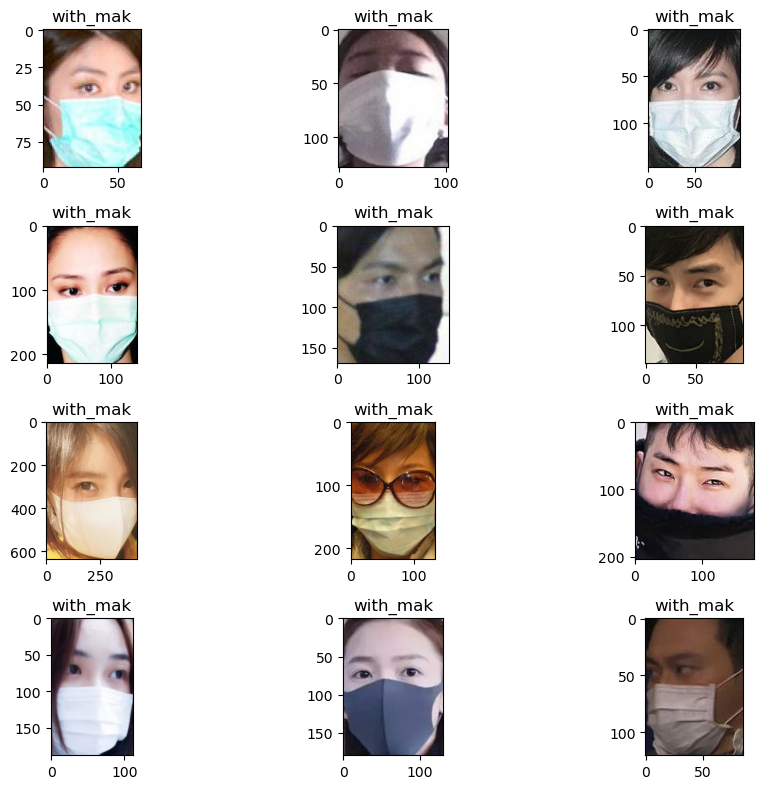

In [21]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(images[i])
    plt.title(dic[labels[i]])
plt.tight_layout()

### Shuffle both image list and label list (In both Training and testing set)

In [22]:
images,labels=shuffle(images,labels)

### Plot a few images from our shuffled list with its corresponding label (Either from training or test set)

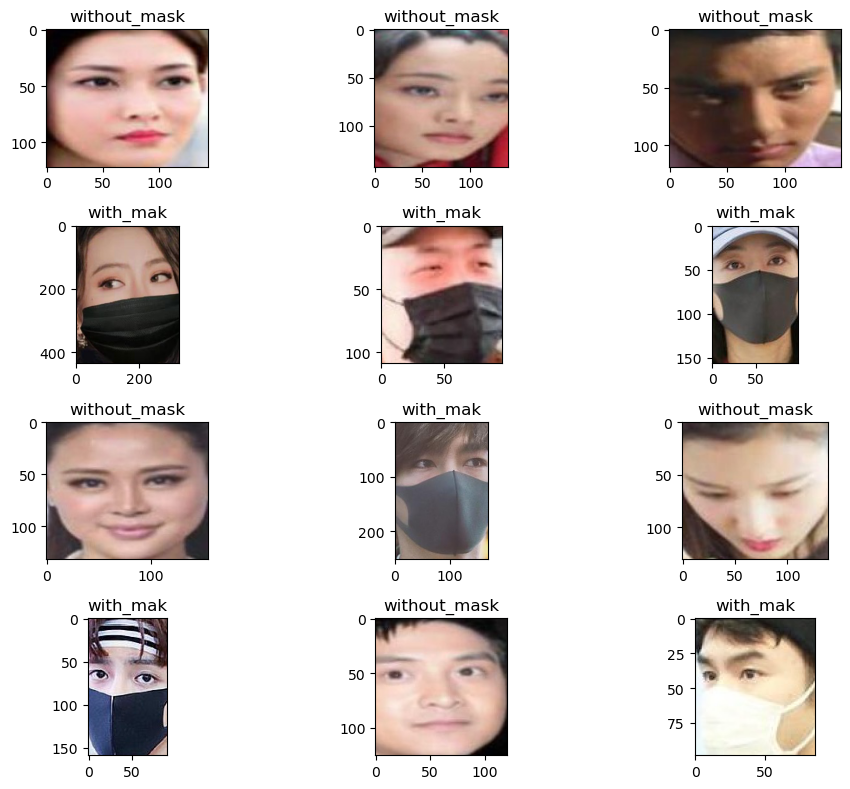

In [23]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(images[i])
    plt.title(dic[labels[i]])
plt.tight_layout()

### Reshape the images to 224x224( For both training and testing set)

In [24]:
d=[]
for i in images:
    d.append(resize(i,(224,224,3)))

## print few images after reshape

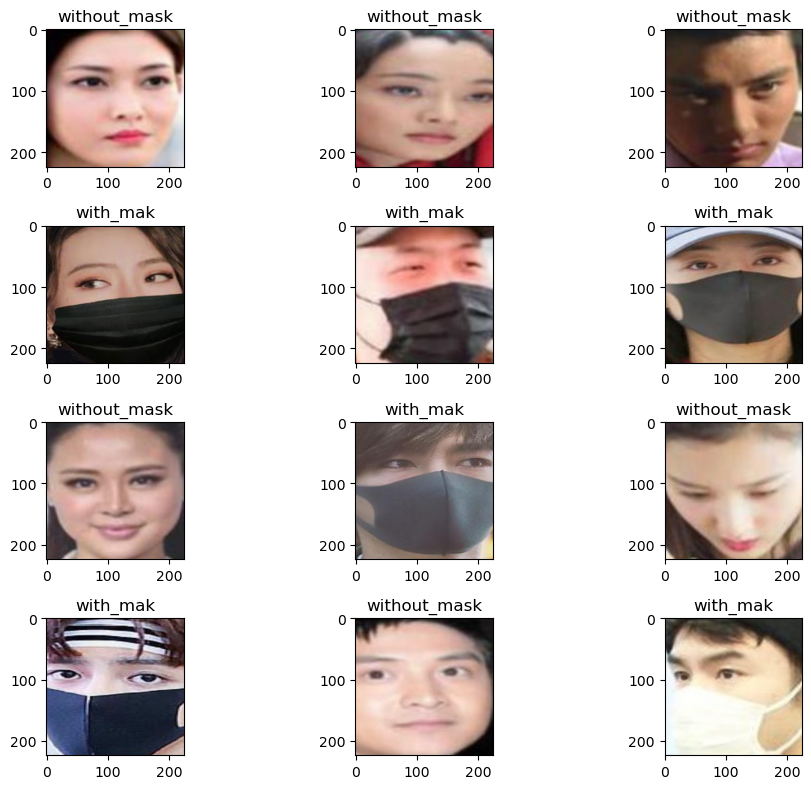

In [25]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(d[i])
    plt.title(dic[labels[i]])
plt.tight_layout()

### Create numpy arrays named y_train and y_test from our training and testing label lists we created earlier

In [26]:
X=np.array(d)
y=np.array(labels)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

### MobileNetV2 Pre-trained Feature Extractor Model URL 
* "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [29]:
feature= "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

### Load Pre-trained MobileNetV2 Feature Extractor Model

In [30]:
hub.load(feature)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x20e3e995bd0>

### Define Number of Output Classes

In [37]:
number_of_classes=2

### Instantiate MobileNetV2 without Top Layer as Feature Extractor

In [38]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature, input_shape = (224,224,3), trainable = False
)

### Build Transfer Learning Model using MobileNetV2 Feature Extractor

In [39]:
model = Sequential([
    pretrained_model_without_top_layer,
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    
    layers.Dense(14, activation = 'relu'),
    layers.Dense(number_of_classes, activation = 'softmax')
])

### Compile the model

In [49]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Check the summary of our model

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_5 (Dense)             (None, 64)                81984     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 14)                910       
                                                                 
 dense_7 (Dense)             (None, 2)                 30        
                                                                 
Total params: 2340908 (8.93 MB)
Trainable params: 82924 (323.92 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


### Train the model. 
Make sure to include a validation data with validation_split

In [51]:
model.fit(X_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
24/24 [==============================] - 23s 764ms/step - loss: 0.1029 - accuracy: 0.9645 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 2/10
24/24 [==============================] - 17s 717ms/step - loss: 0.0160 - accuracy: 0.9961 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 3/10
24/24 [==============================] - 17s 725ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 18s 759ms/step - loss: 8.7330e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 18s 768ms/step - loss: 3.6521e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 21s 866ms/step - loss: 4.2281e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 22s 903ms/step - loss: 8.0485e-04 - accuracy: 1.0000 - val_loss: 0.0071 - val_

### Evaluate the model

In [52]:
model.evaluate(X_train,y_train)

25/25 [==============================] - 17s 663ms/step - loss: 2.6782e-04 - accuracy: 1.0000


[0.0002678220334928483, 1.0]

### Make predictions with X_test

In [53]:
y_pred=model.predict(X_test)

7/7 [==============================] - 5s 598ms/step


In [55]:
y_pred=[np.argmax(i) for i in y_pred]

## accuracy score

In [56]:
accuracy_score(y_test,y_pred)

0.99

### Visualise confusion matrix on a heatmap

<Axes: >

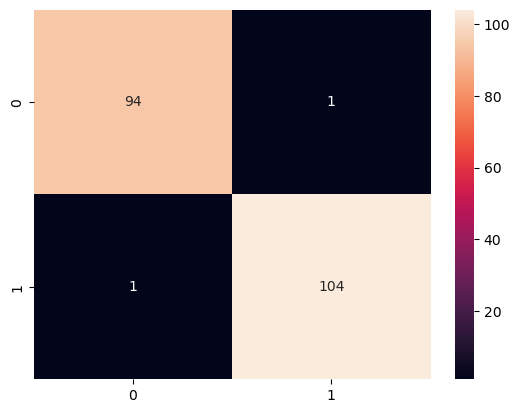

In [58]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

***

## classification report

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        95
           1       0.99      0.99      0.99       105

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

